In [84]:
import pandas as pd


In [85]:
# Basic statistics
dataset = pd.read_csv("../.context-dataset/prob.csv")

print("Methods tested:", dataset["method"].unique(), sep=" ")
print(dataset.head())
print(dataset.describe())
print(dataset.info())


Methods tested: [0 4 3]
   file     qname_ssa anno_gt anno_ta  score  method  loop  reassigned  \
0  x.py      function     int     int      1       0     0           0   
1  x.py    function.a     int     int      1       0     0           0   
2  x.py    function.b     str     int      0       0     0           0   
3  x.py    function.c     int     int      1       0     0           0   
4  x.py  function.vλ1     NaN     int      0       0     0           0   

   nested  user_defined  ctxt_category  
0       0             0              1  
1       0             0              2  
2       0             0              2  
3       0             0              2  
4       0             0              3  
            score     method   loop  reassigned      nested  user_defined  \
count  115.000000  115.00000  115.0       115.0  115.000000    115.000000   
mean     0.043478    2.33913    0.0         0.0    0.156522      0.078261   
std      0.787972    1.70081    0.0         0.0    0.3

In [86]:
dummied_dataset = pd.get_dummies(dataset["ctxt_category"], drop_first=True, prefix="ctxt_category")
dummied_dataset = pd.concat([dataset.drop(columns=["ctxt_category"]), dummied_dataset], axis=1)
print(dummied_dataset.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))
print(dummied_dataset.info())


            score     method   loop  reassigned      nested  user_defined  \
count  115.000000  115.00000  115.0       115.0  115.000000    115.000000   
mean     0.043478    2.33913    0.0         0.0    0.156522      0.078261   
std      0.787972    1.70081    0.0         0.0    0.364939      0.269757   
min     -1.000000    0.00000    0.0         0.0    0.000000      0.000000   
25%     -1.000000    0.00000    0.0         0.0    0.000000      0.000000   
50%      0.000000    3.00000    0.0         0.0    0.000000      0.000000   
75%      1.000000    4.00000    0.0         0.0    0.000000      0.000000   
90%      1.000000    4.00000    0.0         0.0    1.000000      0.000000   
95%      1.000000    4.00000    0.0         0.0    1.000000      1.000000   
99%      1.000000    4.00000    0.0         0.0    1.000000      1.000000   
max      1.000000    4.00000    0.0         0.0    1.000000      1.000000   

       ctxt_category_2  ctxt_category_3  ctxt_category_4  ctxt_category_5  

In [87]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loop               int64
reassigned         int64
nested             int64
user_defined       int64
ctxt_category_2    uint8
ctxt_category_3    uint8
ctxt_category_4    uint8
ctxt_category_5    uint8
dtype: object


<AxesSubplot: >

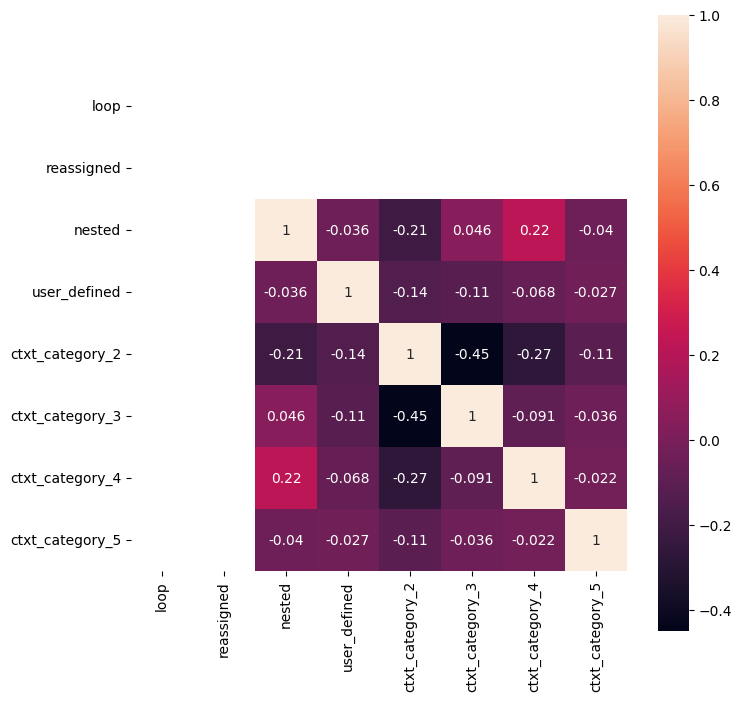

In [88]:
always = ["loop", "reassigned", "nested", "user_defined"]
ccats = [c for c in dummied_dataset.columns if c.startswith("ctxt_category_")]

dataset = dummied_dataset[always + ccats]
dataset = dataset[dataset.notna()]
print(dataset.dtypes)


plt.figure(figsize=(8, 8))

#color = plt.get_cmap('RdYlGn')   # default color
#color.set_bad('lightblue')    # if the value is bad the color would be lightblue instead of white

corr = dataset.corr()
sns.heatmap(corr, annot=True, square=True)
